# Sentiment Analysis

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regex
import re 

# NLTK
import nltk #for text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download("wordnet")
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import  MultinomialNB
from joblib import dump, load
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV


## Data Preprocessing

In [45]:
# Reading data and concatenating
df_1 = pd.read_csv('datasets/twitter-2013dev-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_2 = pd.read_csv('datasets/twitter-2013test-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_3 = pd.read_csv('datasets/twitter-2013train-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_4 = pd.read_csv('datasets/twitter-2014test-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_5 = pd.read_csv('datasets/twitter-2015test-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_6 = pd.read_csv('datasets/twitter-2015train-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_7 = pd.read_csv('datasets/twitter-2016dev-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_8 = pd.read_csv('datasets/twitter-2016devtest-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
# df_9 = pd.read_csv('datasets/twitter-2016test-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 
df_10 = pd.read_csv('datasets/twitter-2016train-A.txt', delimiter='\t', names=['id', 'sentiment', 'tweet']) 

# Decode unicode-escape characters and convert everything to lowercase
df_1['tweet'] = df_1['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
df_2['tweet'] = df_2['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
df_3['tweet'] = df_3['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
df_4['tweet'] = df_4['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
df_5['tweet'] = df_5['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
df_6['tweet'] = df_6['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
df_7['tweet'] = df_7['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
# df_8['tweet'] = df_8['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode_escape')) # UnicodeDecodeError: 'unicodeescape' codec can't decode byte 0x5c in position 139: \ at end of string
df_10['tweet'] = df_10['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape').lower())

# Concatenate dataframes
tweets_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_10],axis=0)
tweets_df

C:\Users\WDIMACULANGAN\AppData\Local\Temp\ipykernel_14404\1201518197.py:14: DeprecationWarning: invalid escape sequence '\ '
  df_1['tweet'] = df_1['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
C:\Users\WDIMACULANGAN\AppData\Local\Temp\ipykernel_14404\1201518197.py:14: DeprecationWarning: invalid escape sequence '\m'
  df_1['tweet'] = df_1['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
C:\Users\WDIMACULANGAN\AppData\Local\Temp\ipykernel_14404\1201518197.py:15: DeprecationWarning: invalid escape sequence '\ '
  df_2['tweet'] = df_2['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
C:\Users\WDIMACULANGAN\AppData\Local\Temp\ipykernel_14404\1201518197.py:15: DeprecationWarning: invalid escape sequence '\i'
  df_2['tweet'] = df_2['tweet'].apply(lambda x: x.encode('utf-8').decode('unicode-escape'))
C:\Users\WDIMACULANGAN\AppData\Local\Temp\ipykernel_14404\1201518197.py:15: DeprecationWarning: invalid escape sequence '\('
  df_2[

,id,sentiment,tweet
0,260097528899452929,neutral,"Won the match #getin . Plus, tomorrow is a ver..."
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y’all hear what Tony Romo dressed up as fo...
...,...,...,...
5863,639855845958885376,positive,@racalto_sk ok good to know. punting at metlif...
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...
5866,640975710354567168,positive,anybody want a ticket for tomorrow colombia vs...


In [46]:
# Check if sentiment is correct unique in the dataframe
tweets_df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Sentiment Distribution')

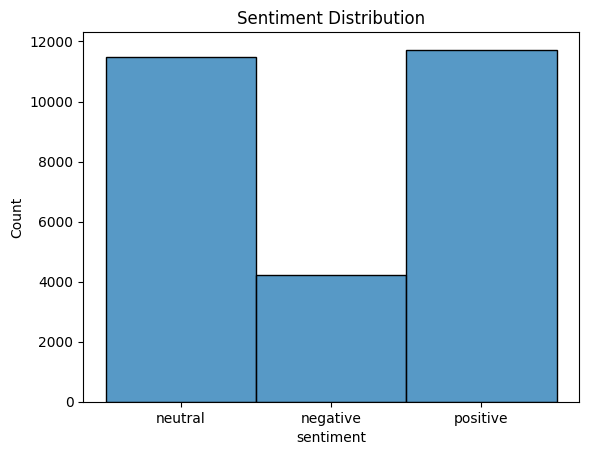

In [47]:
# Plot number of sentiments to get an idea of the distribution
plt.figure()
sns.histplot(data=tweets_df, x=tweets_df['sentiment'])
plt.title("Sentiment Distribution")

We can see from the data that there is an imbalance in the dataset.

Before anything else, let us preprocess the dataset. The following will be done to apply preprocessing on the data:
1. Unicode escape sequence `\u` will be decoded.
2. Punctuations will be  removed.
3. Links will be removed.
4. `#` and `@` characters will also be removed from the texts, but the word following it will be retained.
5. Numbers will be removed but numbers following letters (e.g. 2nd, 16th) will be retained

After cleaning the text, preprocessing, the following steps will be done:
1. Words will be tokenized.
2. After tokenization, words will be lemmatized
3. After lemmatization, stop

In [48]:
def clean_text(text):
    """
    Removes @, #, and punctuation marks from the text.

    Parameters:
        text (str): tokenized tweet.
    Returns:
        str: The cleaned tweet text.
    """
    # Convert text to lowercase
    text = text.lower()

    # Replace @, #, links and non-word characters with a space
    pattern = re.compile(r'(http|https)://[^\s]+|[^\w\s@#]|[@#]|\d+:\d+|\d+(?![a-zA-Z])|_')
    cleaned_text = pattern.sub(' ', text)

    

    # Remove extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

def preprocess_text(text):
    """
    Preprocesses the text.

    Parameters:
        text (str): tokenized tweet.
    Returns:
        str: The cleaned tweet text.
    """
    # Clean text
    cleaned_text = clean_text(text)
    
    # Tokenize the text
    words = word_tokenize(cleaned_text)
    filtered_words = []
    
    # Remove English Stop Words
    stop_words = stopwords.words('English')
    stop_words.remove("not")
    stop_words = set(stop_words)
    
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    # print("Filtered: ", filtered_words)
    
    # Lemmatize the text for nouns
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in filtered_words:
        lemmatized_word = lemmatizer.lemmatize(word, pos='n')
        lemmatized_words.append(lemmatized_word) 
    # print("Lemmatized words:", lemmatized_words)

    # Lemmatize for verbs
    final_lemmatized_words = []
    for word in lemmatized_words:
        lemmatized_word = lemmatizer.lemmatize(word, pos='v')
        final_lemmatized_words.append(lemmatized_word)
    
    processed_text = ' '.join(final_lemmatized_words)
    return processed_text


In [49]:
# stop_words = set(stopwords.words('English'))
stop_list = stopwords.words('English')
stop_list.remove("me")
print(stop_list)

['i', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 

In [50]:
print(set(stopwords.words('English')))
# WordNetLemmatizer().lemmatize("us", pos='n')
text = "2nd not 2 Done with the updates! Hurray for me!! Ahehe^_^ Now I can go to sleep. Six loads pa ang bubunuin ko tomorrow...Aja! God bless everyone:)"

preprocess_text(text)

{'about', 'on', 'hasn', 'm', 'up', 'very', 'while', 'be', "haven't", 'other', "weren't", 'yours', 'itself', 'themselves', 'why', 'how', "wasn't", "it's", 'nor', 'whom', 'over', 'after', 'should', 'through', 'its', 'of', 'not', 'there', 'been', 'few', "should've", 'further', 'ours', 'a', "you'll", 'ain', 'to', "shouldn't", 'doing', 'off', 'now', 'until', 'herself', 'did', 'once', 'won', 'an', 'as', 'with', 'hers', "doesn't", 'having', 'when', 'the', 'here', 'our', 'no', 'she', 'shouldn', 'didn', "isn't", 'yourself', 'is', 'if', 're', 'from', "couldn't", 'they', "aren't", 'or', 'you', 'himself', 'out', 'during', 'any', 'just', 'weren', 'at', 'ourselves', 'isn', "shan't", "mightn't", 'theirs', 'most', "that'll", 'them', 'same', 'will', "hasn't", 'because', "she's", 'aren', 'your', 'this', 'd', 'doesn', 'll', 'below', 'wasn', 'don', 'my', 'that', 'who', 'has', 'their', 'these', 'shan', 'each', 'him', 'both', 'before', "you're", 't', "needn't", 'does', 'those', 'her', 'only', 'he', 'again',

'2nd not do update hurray ahehe go sleep six load pa ang bubunuin ko tomorrow aja god bless everyone'

In [51]:
tweets_df['cleaned_tokenized_text'] = tweets_df['tweet'].apply(preprocess_text)
# tweets_df.to_csv("sample.csv")

## Model Selection and Training

In [52]:
tweets_df

,id,sentiment,tweet,cleaned_tokenized_text
0,260097528899452929,neutral,"Won the match #getin . Plus, tomorrow is a ver...",match getin plus tomorrow busy day awareness d...
1,263791921753882624,neutral,Some areas of New England could see the first ...,area new england could see first flake season ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...,francesco con 2nd worst qb definitely tony rom...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...,thailand washington u president barack obama v...
4,263816256640126976,neutral,Did y’all hear what Tony Romo dressed up as fo...,hear tony romo dress halloween giant quaterbac...
...,...,...,...,...
5863,639855845958885376,positive,@racalto_sk ok good to know. punting at metlif...,racalto sk ok good know punt metlife december ...
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,everyone sit around metlife annoy didnt let ru...
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,giant niner fan would wan na go sunday night g...
5866,640975710354567168,positive,anybody want a ticket for tomorrow colombia vs...,anybody want ticket tomorrow colombia v peru m...


In [53]:
vectorizer = TfidfVectorizer(max_features=1000)
matrix = vectorizer.fit_transform(tweets_df['cleaned_tokenized_text'])
# Save the vectorizer
dump(vectorizer, 'tfidf_vectorizer.joblib')
print(matrix)

  (0, 231)	0.7022235374236776
  (0, 225)	0.36293270771046665
  (0, 143)	0.3683113918521068
  (0, 906)	0.14366142135801446
  (0, 682)	0.34826083701245103
  (0, 548)	0.31238511041800887
  (1, 922)	0.3164471755046449
  (1, 779)	0.32343884891538704
  (1, 326)	0.3127935195723125
  (1, 781)	0.23963876142931895
  (1, 206)	0.36026808167657925
  (1, 276)	0.46199633798870954
  (1, 607)	0.2741511991354224
  (1, 60)	0.47073281942554085
  (2, 873)	0.2570699105025815
  (2, 430)	0.34469622316832554
  (2, 292)	0.28426651972501354
  (2, 80)	0.3187447818759387
  (2, 796)	0.33265178524171063
  (2, 509)	0.19602552145023025
  (2, 539)	0.2626368887180149
  (2, 752)	0.361569362000011
  (2, 237)	0.344019456023526
  (2, 980)	0.348962403638129
  (2, 4)	0.2092271139825006
  :	:
  (27447, 561)	0.4514555700853396
  (27447, 61)	0.41751003692505007
  (27447, 40)	0.41791688280137346
  (27447, 811)	0.31664537120491304
  (27447, 503)	0.36088919264740715
  (27447, 615)	0.2514506639257998
  (27447, 292)	0.391772867247627

In [54]:
features = matrix

labels = tweets_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=77, test_size=0.3, shuffle=True)

print(X_train)
print(y_train)

  (0, 764)	0.4624064537435919
  (0, 838)	0.38881501837036286
  (0, 746)	0.43565423383090146
  (0, 893)	0.37314472924752756
  (0, 355)	0.2821247618976834
  (0, 769)	0.2769843466085776
  (0, 481)	0.3179318885907616
  (0, 363)	0.22039999383175107
  (1, 705)	0.3335016242689916
  (1, 147)	0.3820889292238473
  (1, 357)	0.39718987681436685
  (1, 387)	0.37529674769359034
  (1, 96)	0.37885532148552525
  (1, 224)	0.3135456809289375
  (1, 610)	0.277458214831801
  (1, 701)	0.35405078742544577
  (2, 542)	0.464975979973873
  (2, 953)	0.34899912388972903
  (2, 406)	0.561080486693874
  (2, 796)	0.5892246065999818
  (3, 45)	0.3181533146533444
  (3, 925)	0.38347603844386896
  (3, 538)	0.27473060002061306
  (3, 907)	0.2894202481697938
  (3, 461)	0.4191930693670246
  :	:
  (19210, 360)	0.24925203458696946
  (19210, 550)	0.14117077651957488
  (19210, 509)	0.17891699766530503
  (19211, 878)	0.3865283380158787
  (19211, 522)	0.2715553716939509
  (19211, 243)	0.39600058596101395
  (19211, 774)	0.3212054978541

In [55]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions))

c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.59      0.27      0.37      1290
     neutral       0.60      0.73      0.66      3527
    positive       0.68      0.67      0.68      3419

    accuracy                           0.63      8236
   macro avg       0.62      0.56      0.57      8236
weighted avg       0.63      0.63      0.62      8236



The performance is inadequate, therefore let's try to use a random under sampler.

In [56]:
labels.value_counts()

sentiment
positive    11726
neutral     11494
negative     4231
Name: count, dtype: int64

In [57]:
# Random Undersampler
rus = RandomUnderSampler(random_state=0)

X_res, y_res = rus.fit_resample(features, labels)

print(y_res.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=77, test_size=0.3, shuffle=True)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions))

sentiment
negative    4231
neutral     4231
positive    4231
Name: count, dtype: int64
              precision    recall  f1-score   support

    negative       0.61      0.65      0.63      1250
     neutral       0.56      0.57      0.57      1322
    positive       0.64      0.60      0.62      1236

    accuracy                           0.60      3808
   macro avg       0.61      0.60      0.61      3808
weighted avg       0.61      0.60      0.60      3808



c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Since the other metrics have improved after balancing the dataset, let us try using other models

In [58]:
# # Initialize Models

# svm = SVC(random_state=77, kernel='linear', probability=True)
# dt = DecisionTreeClassifier(random_state=77)
# rf = RandomForestClassifier(random_state=77)
# nb = MultinomialNB()
# models = {'SVM': svm, 'Decision Trees': dt,"Random Forest": rf, "Naive Bayes": nb}
# trained_models = {}

# print(y_train.value_counts())

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     prediction = model.predict(X_test)
#     print(f"{name}", classification_report(y_test, prediction))
#     print('\n')
#     # Save the model
#     dump(model, f"{name}_model.joblib")


The following are the saved result
```
sentiment
positive    2995
negative    2981
neutral     2909
Name: count, dtype: int64
SVM               precision    recall  f1-score   support

    negative       0.59      0.64      0.61      1250
     neutral       0.55      0.58      0.56      1322
    positive       0.67      0.57      0.62      1236

    accuracy                           0.60      3808
   macro avg       0.60      0.60      0.60      3808
weighted avg       0.60      0.60      0.60      3808



Decision Trees               precision    recall  f1-score   support

    negative       0.49      0.53      0.51      1250
     neutral       0.50      0.46      0.48      1322
    positive       0.55      0.54      0.54      1236

    accuracy                           0.51      3808
   macro avg       0.51      0.51      0.51      3808
weighted avg       0.51      0.51      0.51      3808



Random Forest               precision    recall  f1-score   support

    negative       0.56      0.61      0.58      1250
     neutral       0.54      0.56      0.55      1322
    positive       0.66      0.58      0.62      1236

    accuracy                           0.58      3808
   macro avg       0.59      0.58      0.58      3808
weighted avg       0.59      0.58      0.58      3808



Naive Bayes               precision    recall  f1-score   support

    negative       0.59      0.64      0.62      1250
     neutral       0.55      0.51      0.53      1322
    positive       0.60      0.59      0.60      1236

    accuracy                           0.58      3808
   macro avg       0.58      0.58      0.58      3808
weighted avg       0.58      0.58      0.58      3808


```

## Hyperparameter Tuning

In [59]:
def preform_gridsearchcv(model_name, model, model_params, X_train, y_train):
    grid_search_model = GridSearchCV(model, model_params, cv=5)
    grid_search_model.fit(X_train, y_train)

    # Get best parameters
    best_params = grid_search_model.best_params_
    best_estimator = grid_search_model.best_estimator_
    print(f"{model_name} Best Parameters:")
    print(best_params)
    print(f"{model_name} Best Estimators:")
    print(best_estimator)


In [60]:
# Declare models again
svm = SVC(random_state=77, probability=True)
dt = DecisionTreeClassifier(random_state=77)
rf = RandomForestClassifier(random_state=77)
nb = MultinomialNB()

In [61]:
# # Naive Bayes Hyperparameter Tuning
# naive_bayes_params = {'alpha': [0.1, 0.5, 1, 2]}
# preform_gridsearchcv("Naive Bayes", nb, naive_bayes_params, X_train, y_train)

# # SVM
# svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
# preform_gridsearchcv("SVM", svm, svm_params, X_train, y_train)

# # Decision Trees
# decision_tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
# preform_gridsearchcv("Decision Trees", dt, decision_tree_params, X_train, y_train)

# # Random Forest
# random_forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
# preform_gridsearchcv("Random Forest", rf, random_forest_params, X_train, y_train)


```
Naive Bayes Best Parameters:
{'alpha': 2}
Naive Bayes Best Estimators:
MultinomialNB(alpha=2)
SVM Best Parameters:
{'C': 1, 'kernel': 'rbf'}
SVM Best Estimators:
SVC(C=1, probability=True, random_state=77)
Decision Trees Best Parameters:
{'criterion': 'gini', 'max_depth': None}
Decision Trees Best Estimators:
DecisionTreeClassifier(random_state=77)
Random Forest Best Parameters:
{'max_depth': None, 'n_estimators': 100}
Random Forest Best Estimators:
RandomForestClassifier(random_state=77)
```


In [62]:
# Tuned
svm = SVC(C=1, kernel= 'rbf', random_state=77, probability=True)
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= None, random_state=77)
rf = RandomForestClassifier(max_depth= None, n_estimators=100, random_state=77)
nb = MultinomialNB(alpha=2)

models = {'SVM': svm, 'Decision Trees': dt,"Random Forest": rf, "Naive Bayes": nb}
trained_models = {}

print(y_train.value_counts())

for name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"{name}", classification_report(y_test, prediction))
    print('\n')
    # Save the model
    dump(model, f"{name}_model.joblib")

sentiment
positive    2995
negative    2981
neutral     2909
Name: count, dtype: int64
SVM               precision    recall  f1-score   support

    negative       0.61      0.65      0.63      1250
     neutral       0.56      0.60      0.58      1322
    positive       0.67      0.57      0.61      1236

    accuracy                           0.61      3808
   macro avg       0.61      0.61      0.61      3808
weighted avg       0.61      0.61      0.61      3808



Decision Trees               precision    recall  f1-score   support

    negative       0.50      0.53      0.51      1250
     neutral       0.49      0.46      0.47      1322
    positive       0.55      0.55      0.55      1236

    accuracy                           0.51      3808
   macro avg       0.51      0.51      0.51      3808
weighted avg       0.51      0.51      0.51      3808



Random Forest               precision    recall  f1-score   support

    negative       0.57      0.63      0.60      1250
     

In [63]:
user_input = "Going to a bulls game next Thursday"

cleaned_input = preprocess_text(user_input)
cleaned_input

'go bull game next thursday'

In [67]:
loaded_model = load('SVM_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')
user_input = "I am not happy"

cleaned_input = preprocess_text(user_input)
user_input_tfidf = vectorizer.transform([cleaned_input])

predicted_label = loaded_model.predict(user_input_tfidf)

probability_estimates = loaded_model.predict_proba(user_input_tfidf)

print("Predicted Label:", predicted_label)
print("Probability Estimates:", probability_estimates)


Predicted Label: ['positive']
Probability Estimates: [[0.2777904  0.01337028 0.70883932]]
